In [2]:
import sys
sys.path.insert(1,"../src")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import util
# import GA_util
import os
import plate_util
import GA_util
from scipy.stats import mannwhitneyu,ttest_ind,wilcoxon

In [9]:
# data = pd.read_csv("data/processed_gardn_data_4_25.csv")
# data_2 = pd.read_csv('data/processed_gardn_data_final_generator_4.csv')

data = pd.read_csv('data/processed_gardn_data_6_28.csv')

TARGET = 'ADJ_ON_OFF'

In [10]:
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
concs = ['CONC_IN_RXN_4','CONC_IN_RXN_2','CONC_IN_RXN_1']
ons = ['ON_4','ON_2','ON_1']
offs = ['OFF_4','OFF_2','OFF_1']



slope_on = []
slope_off = []
spearman_off = []
for i in range(data.shape[0]):
    
    

    
    row = data.iloc[i,:]

    conc_plot =row[concs].values
    conc_plot = np.insert(conc_plot,0,0.0).astype('float32')

    on_plot = row[ons].values
    on_plot = np.insert(on_plot,0,0.0).astype('float32')


    off_plot = row[offs].values
    off_plot = np.insert(off_plot,0,0.0).astype('float32')

    # print(conc_plot)
    # print(on_plot)

    # a,b = np.polyfit(conc_plot,on_plot,1)
    reg = LinearRegression().fit(conc_plot.reshape(-1,1),on_plot.reshape(-1,1))
    a = reg.coef_[0][0]
    # print(a)

    reg_off = LinearRegression().fit(conc_plot.reshape(-1,1),off_plot.reshape(-1,1))
    a_off = reg_off.coef_[0][0]
#     print(a_off)


#     print(spearmanr(conc_plot,on_plot))
#     print(spearmanr(conc_plot,off_plot))
    
    spearman_off.append(spearmanr(conc_plot,off_plot)[0])
    
    slope_on.append(a)
    slope_off.append(a_off)
    
#     # print('\n')
#     if i%1== 0:
#         plt.figure(figsize=[8,4])
#         plt.suptitle(data.iloc[i,:]['NAME'])
#         plt.subplot(1,2,1)
#         plt.title("ON Vals")
#         plt.scatter(conc_plot,on_plot)
#         plt.plot(conc_plot,a*conc_plot,linestyle='--')


#         plt.subplot(1,2,2)
#         plt.title('OFF Vals')
#         plt.scatter(conc_plot,off_plot)
#         plt.plot(conc_plot,a_off*conc_plot,linestyle='--')

#         plt.show()
    # print('\n')
        
data['SLOPE_ON'] = slope_on
data['SLOPE_OFF'] = slope_off

In [11]:
#Create the adjusted ON values
TARGET_CONC = 0.05

data['ADJ_ON'] = data['SLOPE_ON'] * TARGET_CONC

data['SPEAR_OFF'] = spearman_off

In [12]:
#Adjust the off values to sample if it stays around background
MIN_SPEAR = 0.9

adj_off = []

for i in range(data.shape[0]):
    
    row = data.iloc[i]
    
    spear = row['SPEAR_OFF']
    
    if spear >=MIN_SPEAR:
        tmp = row['SLOPE_OFF'] * TARGET_CONC
        adj_off.append(tmp)
                
    else:
        
        dist = row[['OFF_1','OFF_2','OFF_4']]
        adj_off.append(dist.mean(axis=0))

In [13]:
data['ADJ_OFF'] = adj_off

data['ADJ_ON_OFF'] = data['ADJ_ON'] / data['ADJ_OFF']

In [14]:
tmp = ''
coeff_list = [plate_util.ext_coeff_RNA(i[len('GCGCTAATACGACTCACTATA'):]) for i in data['SWITCH']]

data['EXTINCTION_COEFFICIENT'] = coeff_list

In [15]:
data= data[data[TARGET].notna()]

In [16]:
# data = data[data['NAME'] != 'post_74_2']

In [17]:
# nupack 2
# nupack_complex 2
# screen 5
# pre_74 3
# post_74 4
# pre_93 3-4
# post_93 4
# max_1 3

In [18]:
data.columns

Index(['Unnamed: 0', 'NAME', 'SWITCH', 'TRIGGER', 'OD260_1', 'OD260_2',
       'OD260_4', 'ON_1', 'ON_2', 'ON_4', 'OFF_1', 'OFF_2', 'OFF_4', 'POS',
       'NEG', 'EXTINCTION_COEFFICIENT', 'CONC_IN_RXN_1', 'CONC_IN_RXN_2',
       'CONC_IN_RXN_4', 'ON_OFF_1', 'ON_OFF_2', 'ON_OFF_4', 'BLK', 'SLOPE_ON',
       'SLOPE_OFF', 'ADJ_ON', 'SPEAR_OFF', 'ADJ_OFF', 'ADJ_ON_OFF'],
      dtype='object')

In [19]:
# data.to_csv('data/final/processed_gardn_data_6_28.csv')

In [20]:
for i in range(data.shape[0]):
    
    print(data.iloc[i]['NAME'],data.iloc[i]['ADJ_ON_OFF'])

nupack_1 2.311867430235065
nupack_2 63.64096810338145
nupack_3 69.87452612046052
nupack_4 43.085828821385874
nupack_5 0.645949030102176
nupack_6 51.987236342376164
nupack_complex_1 109.80702039732745
nupack_complex_2 6.962039266415413
nupack_complex_3 72.51013792690618
nupack_complex_4 10.420133576999497
nupack_complex_5 115.16547920730277
nupack_complex_6 22.628808213524024
sandstorm_high_1 126.21137864301413
sandstorm_high_2 89.06766637609715
sandstorm_high_3 22.682566621559488
sandstorm_high_4 74.5472131422765
sandstorm_high_5 6.024918842678876
sandstorm_high_6 56.224523386557976
pre_93_0 11.387492048296588
pre_93_1 33.86483733187016
pre_93_2 64.52013194107276
pre_93_3 42.423203723320796
pre_93_4 35.28869715244988
pre_93_5 16.671614828134672
post_93_0 23.983061816706627
post_93_1 27.54862106104765
post_93_2 17.854580136336562
post_93_3 161.9299239318391
post_93_4 111.31458517045405
post_93_5 84.83917273610136
nupack_free_1 16.886151433884017
nupack_free_2 72.54496756835955
nupack_fr

In [22]:
# TARGET='ADJ_OFF'
# plt.figure(figsize=[20,4])
# plt.bar(np.arange(0,data.shape[0]),data[TARGET],edgecolor='black',lw=2,color=util.BLUE)
# plt.xticks(np.arange(0,data.shape[0]),data['NAME'],rotation=90)
# util.neat_plot()
# plt.show()
# TARGET='ADJ_ON_OFF'
# plt.figure(figsize=[20,4])
# plt.bar(np.arange(0,data.shape[0]),data[TARGET],edgecolor='black',lw=2,color=util.BLUE)
# plt.xticks(np.arange(0,data.shape[0]),data['NAME'],rotation=90)
# util.neat_plot()
# plt.show()

In [23]:
big_screen = pd.read_excel('data/aptaswitch_data.xlsx',sheet_name='high_throughput')

big_screen['SLOPE_ON_OFF'] = big_screen['SLOPE_ON'] / big_screen['SLOPE_OFF']

print(np.mean(big_screen['ADJ_ON_OFF']))

41.895748517328656


0.0217


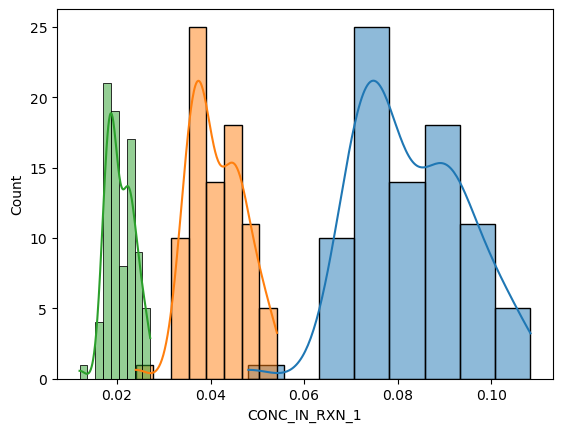

In [24]:
sns.histplot(data['CONC_IN_RXN_1'],kde=True)
sns.histplot(data['CONC_IN_RXN_2'],kde=True)
sns.histplot(data['CONC_IN_RXN_4'],kde=True)
print(min(big_screen['CONC_IN_RXN_1']))

In [25]:
cats = ['_'.join(i.split('_')[:-1]) for i in data['NAME']]

data['GROUP'] = cats

nupack            38.591063
nupack_complex    56.248936
nupack_free       67.923303
post_93           65.207466
post_93_long      74.017523
pre_93            40.453582
pre_93_long       52.565266
sandstorm_high    62.459711
sandstorm_low      6.687799
Name: ADJ_ON_OFF, dtype: float64
41.895748517328656
(12,)
(12,)
(12,)
(12,)
(12,)


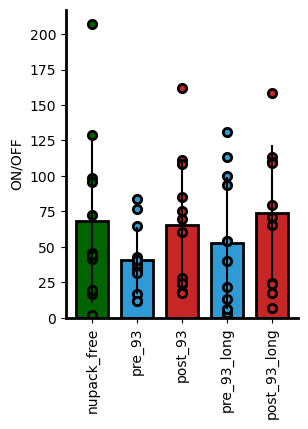

In [26]:
plt.figure(figsize=[3,4])

TARGET='ADJ_ON_OFF'
# plt.subplot(1,2,1)

result =data.groupby(cats)[TARGET].mean()
test = data.groupby(cats)[TARGET].std()
print(result)

print(np.mean(big_screen[TARGET]))

cols = ['nupack_free','pre_93','post_93','pre_93_long','post_93_long']
# cols=['pre_74','post_74']
# cols = ['max',               
# 'max_1',             
# 'max_long',          
# 'nupack',            
# 'nupack_complex',    
# 'nupack_free',
# 'pre_74', 
# 'post_74',           
# 'pre_93',           
# 'post_93',            
# 'pre_93_long',
# 'post_93_long',

# 'sandstorm_low',      
# 'sandstorm_high']            
# cols = ['sandstorm_low','screen']
# cols = ['pre_74','post_74','pre_93','post_93']
# cols = ['nupack','nupack_complex','sandstorm_low','sandstorm_high']
# cols = list(np.unique(cats))

# colors = [util.BLUE if i % 2 == 0 else util.RED  for i in range(len(cols))]
colors = [util.BLUE if i % 2 == 1 else util.RED  for i in range(len(cols))]

colors[0] = 'darkgreen'
# colors = ['darkgreen','darkgreen',util.BLUE,util.RED]
# colors=['lightgrey','lightgrey',util.RED]



# plt.bar(np.arange(0,result.shape[0]),result,edgecolor='black',lw=2)
plt.bar(np.arange(0,len(cols)),result[cols],edgecolor='black',yerr=test[cols],width=0.7,lw=2,color=colors)

# plt.axhline(np.mean(big_screen[TARGET]),linestyle='--',color='red',label='384 Screen Mean')

for i in range(len(cols)):
    
    # print(cols[i])
    
    samps = data[data['GROUP'] == cols[i]][TARGET]
    print(samps.shape)
    
    
    COLOR_TO_USE = colors[i]
    
    
    # for j in range(data[data['GROUP'] == cols[i]].shape[0]):
    for j in range(samps.shape[0]):

        plt.scatter(i,samps.iloc[j],color=COLOR_TO_USE,edgecolor='black',lw=2)

plt.xticks(np.arange(0,len(cols)),labels=cols,rotation=90)
plt.ylabel('ON/OFF')
# plt.ylim([0,130])

locs = list(result.keys())
util.neat_plot()
# plt.savefig('../figures/COVID_SANDSTORM_SCREEN.svg',transparent=True)
# plt.savefig('../figures/forward_designed_aptaswitches.svg',transparent=True)

In [27]:
big_screen

,WELL,SWITCH,TRIGGER,OD260_1,OD260_2,OD260_4,ON_1,ON_2,ON_4,OFF_1,...,ON_OFF_2,ON_OFF_4,BLK,SLOPE_ON,SLOPE_OFF,ADJ_ON,SPEAR_OFF,ADJ_OFF,ADJ_ON_OFF,SLOPE_ON_OFF
0,A1,GCGCTAATACGACTCACTATAGGGCATCTGCTAACAAAGCTTCGCA...,AAACTCTGTGCGAAGCTTTGTTAGCAGATG,2.519250,1.259625,0.629812,6748.75,4029.34,1710.38,68.64,...,62.451023,28.716924,53.8275,74406.670,628.32196,744.06670,1.0,6.283220,118.421249,118.421247
1,A2,GCGCTAATACGACTCACTATAGGGCAGATCTGATTGACCAGACTGA...,ACAGATTATCAGTCTGGTCAATCAGATCTG,2.224000,1.112000,0.556000,3932.46,3120.18,1712.89,131.74,...,31.223657,20.737167,56.3725,47676.650,1482.55710,476.76648,1.0,14.825571,32.158388,32.158390
2,A3,GCGCTAATACGACTCACTATAGGGAGGCGTAGTTCTTTTCCTCTTC...,AGTTCATAGAAGAGGAAAAGAACTACGCCT,2.899250,1.449625,0.724812,9320.54,6024.44,3250.97,205.23,...,41.556460,31.142542,53.8275,87411.550,1830.82870,874.11550,1.0,18.308287,47.744252,47.744254
3,A4,GCGCTAATACGACTCACTATAGGGACCCCCACAGAATTCTTGATTT...,AAGGTATGAAATCAAGAATTCTGTGGGGGT,2.415000,1.207500,0.603750,5571.90,4072.29,2402.11,62.41,...,68.258297,39.948611,56.3725,61975.188,581.37040,619.75183,0.8,60.733333,10.204476,106.601898
4,A5,GCGCTAATACGACTCACTATAGGGAAACTCCACCACATACTGTATA...,ACAGAAGCTATACAGTATGTGGTGGAGTTT,2.190750,1.095375,0.547687,3247.06,2073.19,1096.94,56.49,...,35.615702,19.459642,53.8275,40883.242,580.57440,408.83243,0.8,57.023333,7.169564,70.418610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,P20,GCGCTAATACGACTCACTATAGGGAGGGTCTTCAAACAGCCCTGGG...,GACTTCAGCCCAGGGCTGTTTGAAGACCCT,1.443333,0.721667,0.360833,8907.52,4285.04,2117.08,137.37,...,44.789798,25.770907,59.3875,167779.720,2332.00830,1677.79710,1.0,23.320083,71.946447,71.946451
380,P21,GCGCTAATACGACTCACTATAGGGAATGTTTACTGGAGAGGAAGAT...,TATTTTCCATCTTCCTCTCCAGTAAACATT,1.440000,0.720000,0.360000,250.29,116.89,72.15,75.16,...,2.115273,1.320461,51.7975,4834.108,1274.22600,48.34108,1.0,12.742260,3.793760,3.793760
381,P22,GCGCTAATACGACTCACTATAGGGCGAGTCCATTCAACTGGATGAA...,GAACTCTTTTCATCCAGTTGAATGGACTCG,1.522667,0.761333,0.380667,13392.87,6408.66,3811.25,163.54,...,57.235510,42.239277,59.3875,240898.300,2738.56100,2408.98300,1.0,27.385610,87.965281,87.965285
382,P23,GCGCTAATACGACTCACTATAGGGCCACGGCCAGGAACTTTGTGGG...,AGAATTCACCCACAAAGTTCCTGGCCGTGG,1.446000,0.723000,0.361500,4492.53,749.28,61.47,67.42,...,13.872986,1.179167,51.7975,89775.910,1105.34190,897.75903,1.0,11.053419,81.220030,81.220037


In [64]:
from scipy.stats import ttest_rel

x=data[data['GROUP'] == 'pre_93'][TARGET].values
# x = big_screen['ADJ_ON_OFF']

y=data[data['GROUP'] == 'post_93'][TARGET].values

print(wilcoxon(x,y,alternative='less'))
# print(ttest_ind(x,y,alternative='two-sided'))

WilcoxonResult(statistic=22.0, pvalue=0.101806640625)


In [65]:
test = y/x

np.power(np.prod(test),1/12)

1.4855962695665696

In [66]:
np.mean(y/x)

2.463140205636589

In [67]:
y

array([ 23.98306182,  27.54862106,  17.85458014, 161.92992393,
       111.31458517,  84.83917274,  69.44367579,  24.47712124,
       108.39918463,  74.98164202,  60.49239419,  17.22562976])

In [62]:
from scipy.stats import ttest_rel

x=data[data['GROUP'] == 'pre_93_long'][TARGET].values
# x = big_screen['ADJ_ON_OFF']

y=data[data['GROUP'] == 'post_93_long'][TARGET].values

print(wilcoxon(x,y,alternative='less'))
# print(ttest_ind(x,y,alternative='two-sided'))

WilcoxonResult(statistic=16.0, pvalue=0.03857421875)


In [63]:
y

array([ 65.6064234 ,  79.72222266, 109.57103519, 158.29373777,
        24.04443579,   6.63921119, 113.61896508, 109.97120844,
        70.64708846,  17.10753041,  23.65859223, 109.32982459])

In [57]:
test = y/x

np.power(np.prod(test),1/12)

2.07047592884766

In [58]:
np.mean(y/x)

3.9331828085726657

1.4081070656256198


Text(0.5, 0, 'Optimization Pairs')

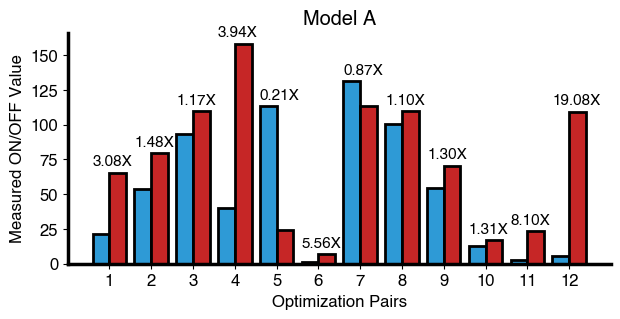

In [31]:
MODEL = '93_long'
TARGET = 'ADJ_ON_OFF'

pre = data[data['GROUP'] == 'pre_%s'%MODEL]
post = data[data['GROUP'] == 'post_%s'%MODEL]
# df = pd.read_csv('sequences/rbs_gardn_sandstorm_10_10_23.csv')
tick_1 = 0.2
tick_2 = 0.6
pre_mean = np.mean(pre[TARGET])
post_mean = np.mean(post[TARGET])
print(post_mean/pre_mean)

plt.figure(figsize=(7,3))
plt.title('Model A')
plt.rcParams.update({'font.size': 11,'font.family':'Helvetica'})
# plt.xticks(ticks=[tick_1,tick_2], labels=['Pre-Optimization ON/OFF','Post-Optimization ON/OFF'])
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2.5)
plt.subplot().spines['bottom'].set_linewidth(2.5)
plt.ylabel('Measured ON/OFF Value')

plt.xticks(np.arange(0,pre.shape[0])+0.4,labels=[1,2,3,4,5,6,7,8,9,10,11,12])
# plt.xticks(np.arange(0,pre.shape[0])+0.4,labels=[1,2,3,4,5,6])

for j in range(pre.shape[0]):
    plt.bar([j + tick_1, j + tick_2],[pre.iloc[j,:][TARGET],post.iloc[j,:][TARGET]],color=[util.BLUE,util.RED],alpha=1,width=0.4,edgecolor='black',linewidth=2)
    plt.text(x=j, y=max(post.iloc[j,:][TARGET],pre.iloc[j,:][TARGET])+5,s='%.2fX'%(post.iloc[j,:][TARGET]/pre.iloc[j,:][TARGET]))

# plt.plot([tick_1,tick_2],[pre_mean,post_mean],color='red',alpha=1,marker='o',linewidth=3,label='Average Change: %.2f'%(post_mean/pre_mean))
# legend = plt.legend(['Pre-Optimization ON/OFF','Post-Optimization ON/OFF'],loc='center')
# legend.legendHandles[0].set_color(util.RED)
# legend.legendHandles[1].set_color(util.BLUE)
# legend.legendHandles[0].set_edgecolor('black')
# legend.legendHandles[1].set_edgecolor('black')
plt.xlabel('Optimization Pairs')
# plt.savefig('../figures/model_b_individual_long.svg',transparent=True)

In [46]:
samps_1 = data[data['GROUP'] == 'pre_93'][TARGET]
samps_2 =  data[data['GROUP'] == 'post_93'][TARGET]

h,p_value = wilcoxon(samps_2,samps_1,alternative='greater')

print(p_value)

0.101806640625


In [47]:
samps_1 = data[data['GROUP'] == 'pre_93_long'][TARGET]
samps_2 =  data[data['GROUP'] == 'post_93_long'][TARGET]

h,p_value = wilcoxon(samps_2,samps_1,alternative='greater')

print(p_value)

0.03857421875


In [36]:
samps_1 = data[data['GROUP'] == 'sandstorm_low'][TARGET]
samps_2 =  data[data['GROUP'] == 'sandstorm_high'][TARGET]

h,p_value = mannwhitneyu(samps_2,samps_1,alternative='greater')

print(p_value)

0.007575757575757576
